<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/CIFAR_10_Object_Recognition_using_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
# Configure the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [70]:
# dataset API
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [72]:
# extracting the compressed file
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Dataset is extracted')

Dataset is extracted


In [73]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [74]:
!pip install py7zr

In [75]:
import py7zr
archive = py7zr.SevenZipFile('train.7z', mode='r')
archive.extractall()
archive.close()

In [76]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the Libraries

In [77]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [78]:
filenames = os.listdir('train')

In [79]:
type(filenames)

list

In [80]:
len(filenames)

50000

In [81]:
print(filenames[0:5])
print(filenames[-5:])

['15353.png', '15164.png', '13807.png', '39738.png', '25901.png']
['48209.png', '26100.png', '46039.png', '3465.png', '5231.png']


**Label Processing**

In [82]:
df = pd.read_csv('trainLabels.csv')
df.shape

(50000, 2)

In [83]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [84]:
df[df['id']==15353]

,id,label
15352,15353,airplane


In [85]:
df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [86]:
df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [87]:
df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [88]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}
labels = [labels_dictionary[i] for i in df['label']]

In [89]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


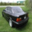

In [90]:
# displaying the sample image
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('train/46731.png')
cv2_imshow(img)

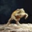

In [91]:
# displaying the sample image
img = cv2.imread('train/10030.png')
cv2_imshow(img)

In [92]:
df[df['id']==10030]

,id,label
10029,10030,frog


In [93]:
df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [94]:
id_list = list(df['id'])

In [95]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Processing**

In [96]:
# Convert images to numpy array
train_data_folder = 'train/'
data = []
for id in id_list:
  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [97]:
type(data)

list

In [98]:
len(data)

50000

In [99]:
type(data[0])

numpy.ndarray

In [100]:
data[0].shape

(32, 32, 3)

In [101]:
data[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [102]:
# Convert image list and label list to numpy arrays
X = np.array(data)
Y = np.array(labels)

In [103]:
type(X)

numpy.ndarray

In [104]:
X.shape, Y.shape

((50000, 32, 32, 3), (50000,))

**Train Test Split**

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [106]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [107]:
# Scaling the dataset
X_train_scale = X_train/255
X_test_scale = X_test/255

In [108]:
X_train_scale

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

In [109]:
X_train[0]

array([[[209, 210, 203],
        [213, 214, 209],
        [218, 219, 215],
        ...,
        [127,  74,  39],
        [122,  68,  35],
        [116,  63,  32]],

       [[210, 210, 202],
        [213, 214, 207],
        [218, 220, 214],
        ...,
        [124,  70,  35],
        [121,  67,  33],
        [123,  69,  36]],

       [[206, 205, 195],
        [209, 209, 202],
        [213, 215, 209],
        ...,
        [124,  70,  37],
        [131,  77,  42],
        [131,  78,  41]],

       ...,

       [[127, 108,  97],
        [138, 122, 110],
        [141, 127, 118],
        ...,
        [158, 149, 134],
        [161, 156, 151],
        [136, 137, 148]],

       [[145, 130, 119],
        [148, 135, 128],
        [136, 127, 128],
        ...,
        [175, 174, 172],
        [160, 161, 170],
        [143, 148, 164]],

       [[138, 128, 123],
        [140, 132, 136],
        [136, 131, 140],
        ...,
        [150, 154, 169],
        [145, 149, 166],
        [140, 145, 163]]

**Buliding the Neural Network**

In [110]:
import tensorflow as tf
from tensorflow import keras

In [111]:
num_of_classes = 10

# Setting up the layers of Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_of_classes, activation='softmax')
])

In [112]:
# Compile the neural network
model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [113]:
# training the neural network
model.fit(X_train_scale, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9808 - acc: 0.2804 - val_loss: 1.8724 - val_acc: 0.3310
Epoch 2/10
1125/1125 [==============================] - 4s 4ms/step - loss: 1.8537 - acc: 0.3343 - val_loss: 1.8150 - val_acc: 0.3425
Epoch 3/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.8186 - acc: 0.3456 - val_loss: 1.8548 - val_acc: 0.3307
Epoch 4/10
1125/1125 [==============================] - 6s 6ms/step - loss: 1.8029 - acc: 0.3559 - val_loss: 1.8270 - val_acc: 0.3388
Epoch 5/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.7857 - acc: 0.3599 - val_loss: 1.7652 - val_acc: 0.3672
Epoch 6/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7745 - acc: 0.3620 - val_loss: 1.7600 - val_acc: 0.3640
Epoch 7/10
1125/1125 [==============================] - 3s 3ms/step - loss: 1.7591 - acc: 0.3679 - val_loss: 1.7758 - val_acc: 0.3615
Epoch 8/10
1125/1125 [==============================] - 4s 3ms

**ResNet50**

In [114]:
from tensorflow.keras import Sequential, models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [115]:
convolutional_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256,256, 3))
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [116]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

In [121]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [122]:
history = model.fit(X_train_scale, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 497s 426ms/step - loss: 0.9820 - acc: 0.6751 - val_loss: 0.4538 - val_acc: 0.8388
Epoch 2/10
1125/1125 [==============================] - 479s 426ms/step - loss: 0.3976 - acc: 0.8709 - val_loss: 0.2809 - val_acc: 0.8995
Epoch 3/10
1125/1125 [==============================] - 479s 426ms/step - loss: 0.2318 - acc: 0.9244 - val_loss: 0.2457 - val_acc: 0.9162
Epoch 4/10
1125/1125 [==============================] - 479s 426ms/step - loss: 0.1417 - acc: 0.9541 - val_loss: 0.2171 - val_acc: 0.9287
Epoch 5/10
1125/1125 [==============================] - 479s 426ms/step - loss: 0.0940 - acc: 0.9704 - val_loss: 0.2006 - val_acc: 0.9395
Epoch 6/10
1125/1125 [==============================] - 484s 431ms/step - loss: 0.0656 - acc: 0.9797 - val_loss: 0.2079 - val_acc: 0.9360
Epoch 7/10
1125/1125 [==============================] - 478s 425ms/step - loss: 0.0488 - acc: 0.9850 - val_loss: 0.2354 - val_acc: 0.9315
Epoch 8/10
1125/1125 [============

In [123]:
loss, accuracy = model.evaluate(X_test_scale, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 41s 121ms/step - loss: 0.2205 - acc: 0.9398
Test Accuracy = 0.9398000240325928


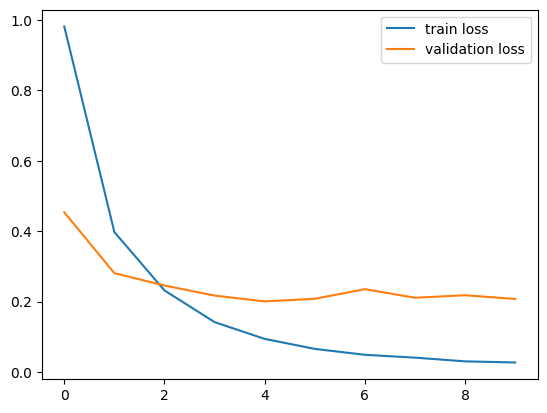

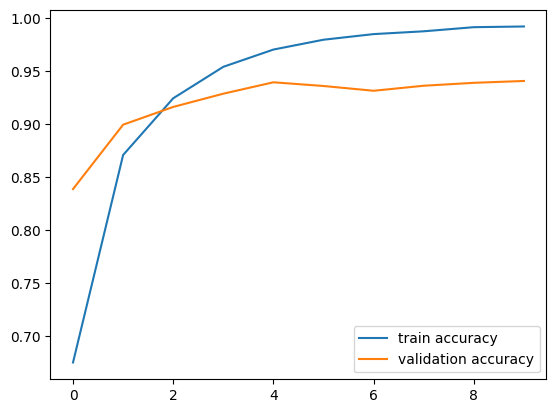

In [124]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()